# Bank Nifty Futures Analysis

## Comprehensive Analysis of Bank Nifty Futures Data (25-Apr-2025 to 25-Jul-2025)

This notebook provides detailed insights into Bank Nifty futures trading patterns, price movements, volume analysis, and trading strategies based on historical data.

---

## 1. Import Required Libraries

We'll start by importing all necessary libraries for data analysis and visualization.

In [2]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from scipy import stats
import plotly.offline as pyo

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure plotly
pyo.init_notebook_mode(connected=True)

print("📊 All libraries imported successfully!")
print("🎯 Ready for Bank Nifty Futures Analysis")
print("=" * 50)

📊 All libraries imported successfully!
🎯 Ready for Bank Nifty Futures Analysis


## 2. Load and Examine the Data

Loading the Bank Nifty futures data and performing initial data exploration to understand the structure and content.

In [15]:
# Load ALL Bank Nifty futures data files and merge them
print("📂 LOADING ALL BANK NIFTY FUTURES DATA FILES")
print("=" * 50)

import glob
import os

try:
    # Find all FUTIDX_BANKNIFTY CSV files
    data_path = '../data/'
    csv_files = glob.glob(os.path.join(data_path, 'FUTIDX_BANKNIFTY*.csv'))
    
    print(f"🔍 Found {len(csv_files)} Bank Nifty futures files:")
    for i, file in enumerate(sorted(csv_files), 1):
        filename = os.path.basename(file)
        print(f"   {i:2d}. {filename}")
    
    # Load and combine all CSV files
    dataframes = []
    total_rows = 0
    
    #print(f"\n📥 Loading individual files:")
    #print("-" * 30)
    
    for file in sorted(csv_files):
        filename = os.path.basename(file)
        try:
            # Load each file
            temp_df = pd.read_csv(file)
            
            # Strip whitespace from column names
            temp_df.columns = temp_df.columns.str.strip()
            
            # Add source file information
            temp_df['Source_File'] = filename
            
            dataframes.append(temp_df)
            total_rows += len(temp_df)
            
            #print(f"   ✅ {filename}: {len(temp_df):,} rows")
            
        except Exception as e:
            print(f"   ❌ {filename}: Error - {e}")
    
    # Combine all dataframes
    if dataframes:
        df = pd.concat(dataframes, ignore_index=True)
        print(f"\n🎯 SUCCESSFULLY MERGED ALL FILES!")
        print("=" * 35)
        print(f"✅ Total files processed: {len(dataframes)}")
        print(f"📊 Combined dataset shape: {df.shape}")
        print(f"📈 Total rows: {df.shape[0]:,}")
        print(f"📅 Date range: {df['Date'].min()} to {df['Date'].max()}")
        
        # Show file contribution
        print(f"\n📋 FILE CONTRIBUTION:")
        print("-" * 22)
        file_counts = df['Source_File'].value_counts().sort_index()
        for filename, count in file_counts.items():
            print(f"   {filename}: {count:,} rows")
            
    else:
        print("❌ No files were successfully loaded!")
        df = pd.DataFrame()  # Create empty dataframe as fallback
        
except Exception as e:
    print(f"❌ Error during file processing: {e}")
    df = pd.DataFrame()  # Create empty dataframe as fallback

# Display basic information about the merged dataset
if not df.empty:
    print(f"\n🔍 MERGED DATASET OVERVIEW:")
    print("=" * 30)
    print(f"Number of rows: {df.shape[0]:,}")
    print(f"Number of columns: {len(df.columns)}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Time period: {df['Date'].nunique()} unique trading days")
    print(f"Data sources: {df['Source_File'].nunique()} files")

    print(f"\n📋 COLUMN INFORMATION:")
    print("=" * 25)
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")

    print(f"\n📈 DATA TYPES:")
    print("=" * 15)
    print(df.dtypes)

    print(f"\n📊 DATE RANGE BY SOURCE FILE:")
    print("-" * 32)
    date_ranges = df.groupby('Source_File')['Date'].agg(['min', 'max', 'count'])
    date_ranges.columns = ['Start_Date', 'End_Date', 'Record_Count']
    display(date_ranges)

    '''print(f"\n🔍 FIRST 5 ROWS:")
    print("=" * 20)
    display(df.head())

    print(f"\n📊 LAST 5 ROWS:")
    print("=" * 19)
    display(df.tail())
    '''
    print(f"\n📋 BASIC STATISTICS:")
    print("=" * 22)
    # Select only numeric columns for statistics
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'Source_File' in numeric_cols:
        numeric_cols.remove('Source_File')
    
    if numeric_cols:
        display(df[numeric_cols].describe())
    else:
        print("No numeric columns found for statistics.")
        
else:
    print("❌ No data available for analysis. Please check the CSV files.")

📂 LOADING ALL BANK NIFTY FUTURES DATA FILES
🔍 Found 7 Bank Nifty futures files:
    1. FUTIDX_BANKNIFTY_01-Apr-2024_TO_30-Jun-2024.csv
    2. FUTIDX_BANKNIFTY_01-Apr-2025_TO_30-Jun-2025.csv
    3. FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv
    4. FUTIDX_BANKNIFTY_01-Jan-2025_TO_31-Mar-2025.csv
    5. FUTIDX_BANKNIFTY_01-Jul-2024_TO_30-Sep-2024.csv
    6. FUTIDX_BANKNIFTY_01-Oct-2024_TO_31-Dec-2024.csv
    7. FUTIDX_BANKNIFTY_25-Apr-2025_TO_25-Jul-2025.csv

🎯 SUCCESSFULLY MERGED ALL FILES!
✅ Total files processed: 7
📊 Combined dataset shape: (1311, 15)
📈 Total rows: 1,311
📅 Date range: 01-Apr-2024 to 31-Oct-2024

📋 FILE CONTRIBUTION:
----------------------
   FUTIDX_BANKNIFTY_01-Apr-2024_TO_30-Jun-2024.csv: 183 rows
   FUTIDX_BANKNIFTY_01-Apr-2025_TO_30-Jun-2025.csv: 183 rows
   FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv: 186 rows
   FUTIDX_BANKNIFTY_01-Jan-2025_TO_31-Mar-2025.csv: 186 rows
   FUTIDX_BANKNIFTY_01-Jul-2024_TO_30-Sep-2024.csv: 192 rows
   FUTIDX_BANKNIFTY_01-Oct

,Start_Date,End_Date,Record_Count
Source_File,,,
FUTIDX_BANKNIFTY_01-Apr-2024_TO_30-Jun-2024.csv,01-Apr-2024,31-May-2024,183
FUTIDX_BANKNIFTY_01-Apr-2025_TO_30-Jun-2025.csv,01-Apr-2025,30-May-2025,183
FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv,01-Feb-2024,31-Jan-2024,186
FUTIDX_BANKNIFTY_01-Jan-2025_TO_31-Mar-2025.csv,01-Feb-2025,31-Jan-2025,186
FUTIDX_BANKNIFTY_01-Jul-2024_TO_30-Sep-2024.csv,01-Aug-2024,31-Jul-2024,192
FUTIDX_BANKNIFTY_01-Oct-2024_TO_31-Dec-2024.csv,01-Nov-2024,31-Oct-2024,186
FUTIDX_BANKNIFTY_25-Apr-2025_TO_25-Jul-2025.csv,01-Jul-2025,30-May-2025,195



📋 BASIC STATISTICS:


,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Open Int
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1.311000e+03,1.311000e+03
mean,51793.420862,52093.498703,51486.312128,51797.086918,51800.165866,51797.258124,46908.630816,4.174989e+05,9.883454e+05
std,3247.797901,3230.374082,3284.019852,3262.975095,3257.414164,3262.822776,68687.150684,5.233975e+05,9.992899e+05
min,44500.000000,45138.800000,44404.000000,44773.500000,44861.950000,44866.150000,263.000000,2.074230e+03,4.305000e+03
25%,49060.025000,49388.450000,48780.250000,49048.650000,49057.300000,49048.650000,3162.000000,3.614943e+04,1.191300e+05
50%,51675.000000,52016.600000,51400.000000,51724.300000,51721.350000,51724.300000,11845.000000,1.154254e+05,4.411050e+05
75%,54806.200000,55205.800000,54458.675000,54724.000000,54720.000000,54724.000000,59316.500000,7.459195e+05,1.946985e+06
max,58168.000000,58300.000000,57984.200000,58194.400000,58208.000000,58194.400000,686297.000000,4.974241e+06,3.526710e+06


## 2.1. Merged Dataset Analysis

Analyzing the combined dataset from multiple Bank Nifty futures files to understand data coverage and distribution.

In [16]:
# Comprehensive analysis of the merged dataset
if not df.empty:
    print("🔍 COMPREHENSIVE MERGED DATASET ANALYSIS")
    print("=" * 45)
    
    # Timeline analysis
    print("📅 TIMELINE COVERAGE:")
    print("-" * 20)
    
    # Convert date to datetime for proper analysis
    df['Date_temp'] = pd.to_datetime(df['Date'], format='%d-%b-%Y', errors='coerce')
    
    # Overall date range
    min_date = df['Date_temp'].min()
    max_date = df['Date_temp'].max()
    total_days = (max_date - min_date).days
    unique_trading_days = df['Date_temp'].nunique()
    
    print(f"📊 Overall Coverage:")
    print(f"   Start Date: {min_date.strftime('%d-%b-%Y')}")
    print(f"   End Date:   {max_date.strftime('%d-%b-%Y')}")
    print(f"   Total Days: {total_days} calendar days")
    print(f"   Trading Days: {unique_trading_days} unique days")
    print(f"   Coverage: {unique_trading_days/total_days*100:.1f}% of calendar days")
    
    # Data distribution by year and quarter
    print(f"\n📈 DATA DISTRIBUTION BY YEAR:")
    print("-" * 32)
    df['Year'] = df['Date_temp'].dt.year
    df['Quarter'] = df['Date_temp'].dt.quarter
    
    year_distribution = df['Year'].value_counts().sort_index()
    for year, count in year_distribution.items():
        print(f"   {year}: {count:,} records")
    
    print(f"\n📊 QUARTERLY DISTRIBUTION:")
    print("-" * 28)
    quarterly_dist = df.groupby(['Year', 'Quarter']).size().reset_index(name='Count')
    for _, row in quarterly_dist.iterrows():
        print(f"   Q{row['Quarter']} {row['Year']}: {row['Count']:,} records")
    
    # Monthly trading activity
    print(f"\n📅 MONTHLY TRADING ACTIVITY:")
    print("-" * 30)
    df['Month_Year'] = df['Date_temp'].dt.to_period('M')
    monthly_activity = df.groupby('Month_Year').agg({
        'Date_temp': 'count',
        'Close': ['mean', 'min', 'max'],
        'Turnover * in   ₹ Lakhs': 'sum' if 'Turnover * in   ₹ Lakhs' in df.columns else lambda x: 0
    }).round(2)
    
    # Flatten column names
    monthly_activity.columns = ['Records', 'Avg_Close', 'Min_Close', 'Max_Close', 'Total_Turnover']
    print("Top 10 Most Active Months:")
    display(monthly_activity.nlargest(10, 'Records'))
    
    # Contract expiry analysis
    print(f"\n📋 CONTRACT EXPIRY ANALYSIS:")
    print("-" * 30)
    
    # Parse expiry dates
    df['Expiry_temp'] = pd.to_datetime(df['Expiry'], format='%d-%b-%Y', errors='coerce')
    df['Expiry_Month'] = df['Expiry_temp'].dt.to_period('M')
    
    expiry_analysis = df.groupby('Expiry_Month').agg({
        'Date_temp': 'count',
        'Close': 'mean',
        'Turnover * in   ₹ Lakhs': 'sum' if 'Turnover * in   ₹ Lakhs' in df.columns else lambda x: 0
    }).round(2)
    expiry_analysis.columns = ['Records', 'Avg_Price', 'Total_Turnover']
    
    print("Contract Months with Most Records:")
    display(expiry_analysis.nlargest(10, 'Records'))
    
    # Data quality assessment
    print(f"\n🔍 DATA QUALITY ASSESSMENT:")
    print("-" * 30)
    
    # Check for duplicates
    duplicate_records = df.duplicated(['Date', 'Expiry', 'Symbol']).sum()
    print(f"Duplicate records: {duplicate_records}")
    
    # Check data consistency across files
    print(f"\n📊 FILE DATA CONSISTENCY:")
    print("-" * 28)
    
    file_summary = df.groupby('Source_File').agg({
        'Date_temp': ['min', 'max', 'count'],
        'Symbol': 'nunique',
        'Expiry_temp': 'nunique'
    })
    file_summary.columns = ['Start_Date', 'End_Date', 'Records', 'Unique_Symbols', 'Unique_Expiries']
    display(file_summary)
    
    # Price evolution over time
    print(f"\n💰 PRICE EVOLUTION OVERVIEW:")
    print("-" * 30)
    
    # Calculate yearly price statistics
    price_evolution = df.groupby('Year').agg({
        'Open': ['mean', 'min', 'max'],
        'Close': ['mean', 'min', 'max'],
        'High': 'max',
        'Low': 'min'
    }).round(2)
    
    price_evolution.columns = ['Avg_Open', 'Min_Open', 'Max_Open', 
                              'Avg_Close', 'Min_Close', 'Max_Close',
                              'Highest_High', 'Lowest_Low']
    display(price_evolution)
    
    # Summary statistics
    print(f"\n📊 MERGED DATASET SUMMARY:")
    print("-" * 30)
    print(f"Total Records: {len(df):,}")
    print(f"Unique Trading Days: {df['Date_temp'].nunique():,}")
    print(f"Date Range: {min_date.strftime('%d-%b-%Y')} to {max_date.strftime('%d-%b-%Y')}")
    print(f"Years Covered: {df['Year'].nunique()} years ({df['Year'].min()} - {df['Year'].max()})")
    print(f"Unique Contracts: {df['Expiry_temp'].nunique()}")
    print(f"Price Range: ₹{df['Low'].min():,.2f} - ₹{df['High'].max():,.2f}")
    
    # Clean up temporary columns
    df = df.drop(['Date_temp', 'Expiry_temp', 'Year', 'Quarter', 'Month_Year', 'Expiry_Month'], axis=1)
    
    print(f"\n✅ MERGED DATASET ANALYSIS COMPLETED!")
    print("=" * 40)
    
else:
    print("❌ No merged dataset available for analysis.")

🔍 COMPREHENSIVE MERGED DATASET ANALYSIS
📅 TIMELINE COVERAGE:
--------------------
📊 Overall Coverage:
   Start Date: 01-Jan-2024
   End Date:   25-Jul-2025
   Total Days: 571 calendar days
   Trading Days: 391 unique days
   Coverage: 68.5% of calendar days

📈 DATA DISTRIBUTION BY YEAR:
--------------------------------
   2024: 747 records
   2025: 564 records

📊 QUARTERLY DISTRIBUTION:
----------------------------
   Q1 2024: 186 records
   Q2 2024: 183 records
   Q3 2024: 192 records
   Q4 2024: 186 records
   Q1 2025: 186 records
   Q2 2025: 321 records
   Q3 2025: 57 records

📅 MONTHLY TRADING ACTIVITY:
------------------------------
Top 10 Most Active Months:


,Records,Avg_Close,Min_Close,Max_Close,Total_Turnover
Month_Year,,,,,
2025-05,126,55375.77,53732.00,56460.80,42576302.72
2025-06,126,56601.67,55614.40,58111.80,36321131.70
2025-01,69,49803.94,48080.95,52530.70,24909202.01
2025-04,69,53759.67,50095.70,56025.00,27744609.13
2024-01,66,47272.68,44773.50,49157.65,36692871.31
2024-05,66,48809.92,47607.25,49960.30,31474582.31
2024-07,66,52443.86,50934.20,53576.30,34723614.40
2024-10,66,52105.74,50846.10,53994.70,29670478.43
2024-02,63,46602.73,45090.85,47818.90,37729024.68



📋 CONTRACT EXPIRY ANALYSIS:
------------------------------
Contract Months with Most Records:


,Records,Avg_Price,Total_Turnover
Expiry_Month,,,
2025-07,111,56209.03,20803217.47
2025-06,104,55362.19,36687567.75
2025-05,83,53480.91,45943131.15
2024-07,67,50654.22,35644353.63
2025-02,65,50949.17,22095440.88
2025-03,65,49992.47,16897424.85
2024-09,63,52058.48,23643974.55
2024-10,63,51976.65,30407802.46
2025-01,63,51476.91,25612710.29



🔍 DATA QUALITY ASSESSMENT:
------------------------------
Duplicate records: 138

📊 FILE DATA CONSISTENCY:
----------------------------


,Start_Date,End_Date,Records,Unique_Symbols,Unique_Expiries
Source_File,,,,,
FUTIDX_BANKNIFTY_01-Apr-2024_TO_30-Jun-2024.csv,2024-04-01,2024-06-28,183,1,6
FUTIDX_BANKNIFTY_01-Apr-2025_TO_30-Jun-2025.csv,2025-04-01,2025-06-30,183,1,6
FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv,2024-01-01,2024-03-28,186,1,8
FUTIDX_BANKNIFTY_01-Jan-2025_TO_31-Mar-2025.csv,2025-01-01,2025-03-28,186,1,9
FUTIDX_BANKNIFTY_01-Jul-2024_TO_30-Sep-2024.csv,2024-07-01,2024-09-30,192,1,6
FUTIDX_BANKNIFTY_01-Oct-2024_TO_31-Dec-2024.csv,2024-10-01,2024-12-31,186,1,6
FUTIDX_BANKNIFTY_25-Apr-2025_TO_25-Jul-2025.csv,2025-04-25,2025-07-25,195,1,5



💰 PRICE EVOLUTION OVERVIEW:
------------------------------


,Avg_Open,Min_Open,Max_Open,Avg_Close,Min_Close,Max_Close,Highest_High,Lowest_Low
Year,,,,,,,,
2024,50281.88,44500.0,54919.0,50265.62,44773.5,54972.25,55032.55,44404.00
2025,53795.41,47994.7,58168.0,53825.46,47999.5,58194.40,58300.00,47722.25



📊 MERGED DATASET SUMMARY:
------------------------------
Total Records: 1,311
Unique Trading Days: 391
Date Range: 01-Jan-2024 to 25-Jul-2025
Years Covered: 2 years (2024 - 2025)
Unique Contracts: 26
Price Range: ₹44,404.00 - ₹58,300.00

✅ MERGED DATASET ANALYSIS COMPLETED!


## 3. Data Preprocessing and Cleaning

Cleaning and preprocessing the data to ensure proper formats and handle any data quality issues.

In [17]:
# Data preprocessing and cleaning
print("🧹 DATA PREPROCESSING AND CLEANING")
print("=" * 40)

# Create a copy for processing
df_clean = df.copy()

# Check for missing values
print("🔍 MISSING VALUES CHECK:")
print("-" * 25)
missing_data = df_clean.isnull().sum()
print(missing_data[missing_data > 0])
if missing_data.sum() == 0:
    print("✅ No missing values found!")

# Convert date columns to datetime
print(f"\n📅 CONVERTING DATE COLUMNS:")
print("-" * 30)
try:
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d-%b-%Y')
    df_clean['Expiry'] = pd.to_datetime(df_clean['Expiry'], format='%d-%b-%Y')
    print("✅ Date columns converted successfully!")
except Exception as e:
    print(f"❌ Error converting dates: {e}")

# Clean numeric columns (remove commas and convert to float)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'LTP', 'Settle Price', 
                  'No. of contracts', 'Turnover * in   ₹ Lakhs', 'Open Int', 'Change in OI']

print(f"\n🔢 PROCESSING NUMERIC COLUMNS:")
print("-" * 35)
for col in numeric_columns:
    if col in df_clean.columns:
        try:
            # Convert to string first, then remove commas and convert to float
            df_clean[col] = pd.to_numeric(df_clean[col].astype(str).str.replace(',', ''), errors='coerce')
            print(f"✅ {col}: Converted to numeric")
        except Exception as e:
            print(f"❌ {col}: Error - {e}")

# Handle Underlying Value column separately (has missing values at the end)
if 'Underlying Value' in df_clean.columns:
    try:
        df_clean['Underlying Value'] = pd.to_numeric(
            df_clean['Underlying Value'].astype(str).str.replace(',', '').replace('-', np.nan), 
            errors='coerce'
        )
        print("✅ Underlying Value: Converted to numeric (with NaN for missing values)")
    except Exception as e:
        print(f"❌ Underlying Value: Error - {e}")

# Rename columns for easier access
column_mapping = {
    'Turnover * in   ₹ Lakhs': 'Turnover_Lakhs',
    'No. of contracts': 'Contracts',
    'Open Int': 'Open_Interest',
    'Change in OI': 'OI_Change',
    'Settle Price': 'Settle_Price',
    'Underlying Value': 'Underlying_Value'
}

df_clean = df_clean.rename(columns=column_mapping)

print(f"\n📝 COLUMN RENAMING:")
print("-" * 20)
for old_name, new_name in column_mapping.items():
    if old_name in df.columns:
        print(f"✅ '{old_name}' → '{new_name}'")

# Add derived columns
print(f"\n🧮 ADDING DERIVED COLUMNS:")
print("-" * 30)

# Calculate daily returns
df_clean['Daily_Return'] = df_clean['Close'].pct_change() * 100
print("✅ Daily_Return: Percentage change in Close price")

# Calculate intraday range
df_clean['Intraday_Range'] = df_clean['High'] - df_clean['Low']
df_clean['Intraday_Range_Pct'] = (df_clean['Intraday_Range'] / df_clean['Open']) * 100
print("✅ Intraday_Range: High - Low")
print("✅ Intraday_Range_Pct: Intraday range as percentage of Open")

# Calculate price gaps
df_clean['Price_Gap'] = df_clean['Open'] - df_clean['Close'].shift(1)
df_clean['Price_Gap_Pct'] = (df_clean['Price_Gap'] / df_clean['Close'].shift(1)) * 100
print("✅ Price_Gap: Gap between today's Open and previous Close")
print("✅ Price_Gap_Pct: Price gap as percentage")

# Add days to expiry
df_clean['Days_to_Expiry'] = (df_clean['Expiry'] - df_clean['Date']).dt.days
print("✅ Days_to_Expiry: Number of days until contract expiry")

# Add contract month
df_clean['Contract_Month'] = df_clean['Expiry'].dt.strftime('%b-%Y')
print("✅ Contract_Month: Contract expiry month")

# Sort by date for time series analysis
df_clean = df_clean.sort_values(['Date', 'Expiry']).reset_index(drop=True)

print(f"\n✅ DATA PREPROCESSING COMPLETED!")
print("=" * 35)
print(f"📊 Cleaned dataset shape: {df_clean.shape}")
print(f"📅 Date range: {df_clean['Date'].min().strftime('%d-%b-%Y')} to {df_clean['Date'].max().strftime('%d-%b-%Y')}")
print(f"📋 Contract months: {sorted(df_clean['Contract_Month'].unique())}")

# Display cleaned data sample
print(f"\n🔍 CLEANED DATA SAMPLE:")
print("-" * 25)
display(df_clean[['Date', 'Expiry', 'Open', 'High', 'Low', 'Close', 'LTP', 
                  'Contracts', 'Turnover_Lakhs', 'Open_Interest', 'Daily_Return']].head(10))

🧹 DATA PREPROCESSING AND CLEANING
🔍 MISSING VALUES CHECK:
-------------------------
Series([], dtype: int64)
✅ No missing values found!

📅 CONVERTING DATE COLUMNS:
------------------------------
✅ Date columns converted successfully!

🔢 PROCESSING NUMERIC COLUMNS:
-----------------------------------
✅ Open: Converted to numeric
✅ High: Converted to numeric
✅ Low: Converted to numeric
✅ Close: Converted to numeric
✅ LTP: Converted to numeric
✅ Settle Price: Converted to numeric
✅ No. of contracts: Converted to numeric
✅ Turnover * in   ₹ Lakhs: Converted to numeric
✅ Open Int: Converted to numeric
✅ Change in OI: Converted to numeric
✅ Underlying Value: Converted to numeric (with NaN for missing values)

📝 COLUMN RENAMING:
--------------------
✅ 'Turnover * in   ₹ Lakhs' → 'Turnover_Lakhs'
✅ 'No. of contracts' → 'Contracts'
✅ 'Open Int' → 'Open_Interest'
✅ 'Change in OI' → 'OI_Change'
✅ 'Settle Price' → 'Settle_Price'
✅ 'Underlying Value' → 'Underlying_Value'

🧮 ADDING DERIVED COLUMNS:


,Date,Expiry,Open,High,Low,Close,LTP,Contracts,Turnover_Lakhs,Open_Interest,Daily_Return
0,2024-01-01,2024-01-25,48580.00,48869.00,48389.40,48535.70,48405.00,120422.0,878243.28,2052195.0,-16.393293
1,2024-01-01,2024-02-29,48800.15,49190.00,48715.05,48860.80,48732.00,6601.0,48446.86,171855.0,0.669816
2,2024-01-01,2024-03-28,49100.05,49455.00,49019.55,49157.65,49041.45,2036.0,15041.83,54720.0,0.607542
3,2024-01-02,2024-01-25,48375.00,48489.95,47877.45,47946.65,47882.55,178046.0,1286113.08,2283615.0,-2.463503
4,2024-01-02,2024-02-29,48799.95,48819.95,48242.20,48306.20,48252.95,8244.0,59933.31,180825.0,0.749896
5,2024-01-02,2024-03-28,49150.00,49150.00,48500.00,48594.35,48541.80,1546.0,11317.90,58875.0,0.596507
6,2024-01-03,2024-01-25,47849.85,48086.85,47763.75,47931.95,48006.40,172345.0,1239038.88,1998315.0,-1.363121
7,2024-01-03,2024-02-29,48224.25,48420.00,48123.80,48270.90,48323.00,6858.0,49650.57,190350.0,0.707148
8,2024-01-03,2024-03-28,48501.00,48719.05,48421.90,48551.20,48600.00,1621.0,11806.61,65850.0,0.580681
9,2024-01-04,2024-01-25,48062.30,48581.30,47995.65,48501.75,48560.00,154623.0,1120917.68,2046465.0,-0.101851


## 4. Basic Data Analysis and Statistics

Generating comprehensive statistics and insights about the Bank Nifty futures trading data.

In [18]:
# Basic Data Analysis and Statistics
print("📊 BASIC DATA ANALYSIS AND STATISTICS")
print("=" * 45)

# Price analysis
print("💰 PRICE STATISTICS:")
print("-" * 20)
price_cols = ['Open', 'High', 'Low', 'Close', 'LTP']
price_stats = df_clean[price_cols].describe()
display(price_stats)

print(f"\n📈 PRICE RANGES:")
print("-" * 15)
for col in price_cols:
    min_price = df_clean[col].min()
    max_price = df_clean[col].max()
    price_range = max_price - min_price
    print(f"{col:>6}: ₹{min_price:>8,.2f} - ₹{max_price:>8,.2f} (Range: ₹{price_range:>6,.2f})")

# Volume and Open Interest Analysis
print(f"\n📊 VOLUME & OPEN INTEREST STATISTICS:")
print("-" * 40)
volume_oi_stats = df_clean[['Contracts', 'Turnover_Lakhs', 'Open_Interest', 'OI_Change']].describe()
display(volume_oi_stats)

# Daily Returns Analysis
print(f"\n📈 DAILY RETURNS ANALYSIS:")
print("-" * 30)
returns_stats = df_clean['Daily_Return'].describe()
print(f"Mean Daily Return: {returns_stats['mean']:>8.4f}%")
print(f"Std Deviation:     {returns_stats['std']:>8.4f}%")
print(f"Minimum Return:    {returns_stats['min']:>8.4f}%")
print(f"Maximum Return:    {returns_stats['max']:>8.4f}%")
print(f"Skewness:          {df_clean['Daily_Return'].skew():>8.4f}")
print(f"Kurtosis:          {df_clean['Daily_Return'].kurtosis():>8.4f}")

# Volatility measures
daily_vol = df_clean['Daily_Return'].std()
annualized_vol = daily_vol * np.sqrt(252)
print(f"Daily Volatility:  {daily_vol:>8.4f}%")
print(f"Annualized Vol:    {annualized_vol:>8.4f}%")

# Intraday Range Analysis
print(f"\n📏 INTRADAY RANGE ANALYSIS:")
print("-" * 32)
range_stats = df_clean['Intraday_Range_Pct'].describe()
print(f"Mean Intraday Range: {range_stats['mean']:>6.4f}%")
print(f"Std Deviation:       {range_stats['std']:>6.4f}%")
print(f"Minimum Range:       {range_stats['min']:>6.4f}%")
print(f"Maximum Range:       {range_stats['max']:>6.4f}%")

# Contract-wise analysis
print(f"\n📅 CONTRACT-WISE ANALYSIS:")
print("-" * 28)
contract_analysis = df_clean.groupby('Contract_Month').agg({
    'Close': ['mean', 'min', 'max', 'std'],
    'Contracts': 'mean',
    'Turnover_Lakhs': 'mean',
    'Open_Interest': 'mean',
    'Daily_Return': 'mean'
}).round(2)

contract_analysis.columns = ['Avg_Close', 'Min_Close', 'Max_Close', 'Close_Std', 
                           'Avg_Contracts', 'Avg_Turnover', 'Avg_OI', 'Avg_Return']
display(contract_analysis)

# Trading activity analysis
print(f"\n🔥 TRADING ACTIVITY HIGHLIGHTS:")
print("-" * 35)

# Highest volume days
highest_volume = df_clean.nlargest(5, 'Contracts')[['Date', 'Contract_Month', 'Contracts', 'Turnover_Lakhs', 'Close']]
print("📊 Top 5 Highest Volume Days:")
display(highest_volume)

# Highest volatility days
highest_volatility = df_clean.nlargest(5, 'Intraday_Range_Pct')[['Date', 'Contract_Month', 'Intraday_Range_Pct', 'Daily_Return', 'Close']]
print("\n🎢 Top 5 Most Volatile Days:")
display(highest_volatility)

# Best and worst performing days
print(f"\n📈 BEST PERFORMING DAYS:")
best_days = df_clean.nlargest(5, 'Daily_Return')[['Date', 'Contract_Month', 'Daily_Return', 'Close', 'Contracts']]
display(best_days)

print(f"\n📉 WORST PERFORMING DAYS:")
worst_days = df_clean.nsmallest(5, 'Daily_Return')[['Date', 'Contract_Month', 'Daily_Return', 'Close', 'Contracts']]
display(worst_days)

# Market trend analysis
print(f"\n📊 MARKET TREND ANALYSIS:")
print("-" * 28)
positive_days = (df_clean['Daily_Return'] > 0).sum()
negative_days = (df_clean['Daily_Return'] < 0).sum()
neutral_days = (df_clean['Daily_Return'] == 0).sum()
total_days = len(df_clean.dropna(subset=['Daily_Return']))

print(f"Positive Days: {positive_days:>3} ({positive_days/total_days*100:>5.1f}%)")
print(f"Negative Days: {negative_days:>3} ({negative_days/total_days*100:>5.1f}%)")
print(f"Neutral Days:  {neutral_days:>3} ({neutral_days/total_days*100:>5.1f}%)")

# Correlation analysis
print(f"\n🔗 CORRELATION ANALYSIS:")
print("-" * 25)
correlation_cols = ['Open', 'High', 'Low', 'Close', 'Contracts', 'Open_Interest', 'Turnover_Lakhs']
correlation_matrix = df_clean[correlation_cols].corr()
print("Key Correlations with Close Price:")
close_correlations = correlation_matrix['Close'].sort_values(ascending=False)
for col, corr in close_correlations.items():
    if col != 'Close':
        print(f"{col:>15}: {corr:>6.3f}")

print(f"\n✅ BASIC ANALYSIS COMPLETED!")
print("=" * 30)

📊 BASIC DATA ANALYSIS AND STATISTICS
💰 PRICE STATISTICS:
--------------------


,Open,High,Low,Close,LTP
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,51793.420862,52093.498703,51486.312128,51797.086918,51800.165866
std,3247.797901,3230.374082,3284.019852,3262.975095,3257.414164
min,44500.000000,45138.800000,44404.000000,44773.500000,44861.950000
25%,49060.025000,49388.450000,48780.250000,49048.650000,49057.300000
50%,51675.000000,52016.600000,51400.000000,51724.300000,51721.350000
75%,54806.200000,55205.800000,54458.675000,54724.000000,54720.000000
max,58168.000000,58300.000000,57984.200000,58194.400000,58208.000000



📈 PRICE RANGES:
---------------
  Open: ₹44,500.00 - ₹58,168.00 (Range: ₹13,668.00)
  High: ₹45,138.80 - ₹58,300.00 (Range: ₹13,161.20)
   Low: ₹44,404.00 - ₹57,984.20 (Range: ₹13,580.20)
 Close: ₹44,773.50 - ₹58,194.40 (Range: ₹13,420.90)
   LTP: ₹44,861.95 - ₹58,208.00 (Range: ₹13,346.05)

📊 VOLUME & OPEN INTEREST STATISTICS:
----------------------------------------


,Contracts,Turnover_Lakhs,Open_Interest,OI_Change
count,1311.000000,1.311000e+03,1.311000e+03,1.310000e+03
mean,46908.630816,4.174989e+05,9.883454e+05,1.697334e+04
std,68687.150684,5.233975e+05,9.992899e+05,1.976899e+05
min,263.000000,2.074230e+03,4.305000e+03,-1.348230e+06
25%,3162.000000,3.614943e+04,1.191300e+05,-5.797500e+03
50%,11845.000000,1.154254e+05,4.411050e+05,7.170000e+03
75%,59316.500000,7.459195e+05,1.946985e+06,3.156000e+04
max,686297.000000,4.974241e+06,3.526710e+06,2.304825e+06



📈 DAILY RETURNS ANALYSIS:
------------------------------
Mean Daily Return:   0.0195%
Std Deviation:       1.0918%
Minimum Return:    -16.3933%
Maximum Return:      6.9760%
Skewness:           -3.6932
Kurtosis:           44.6881
Daily Volatility:    1.0918%
Annualized Vol:     17.3320%

📏 INTRADAY RANGE ANALYSIS:
--------------------------------
Mean Intraday Range: 1.1825%
Std Deviation:       0.7106%
Minimum Range:       0.1748%
Maximum Range:       9.6714%

📅 CONTRACT-WISE ANALYSIS:
----------------------------


,Avg_Close,Min_Close,Max_Close,Close_Std,Avg_Contracts,Avg_Turnover,Avg_OI,Avg_Return
Contract_Month,,,,,,,,
Apr-2024,47449.02,45771.45,49019.05,719.84,54614.41,391981.41,1073510.85,0.26
Apr-2025,50765.31,48309.60,55576.80,1790.63,22134.62,344738.91,963403.09,0.33
Aug-2024,51429.90,47688.65,53324.60,1178.29,63848.42,488420.96,1137290.32,-0.06
Aug-2025,56932.33,56054.80,57911.00,522.92,1918.71,38283.95,166467.78,0.38
Dec-2024,52470.71,50608.35,54972.25,966.20,47645.97,376032.30,859766.07,-0.02
Feb-2024,46763.54,45090.85,48860.80,1102.31,143148.51,990930.88,1790700.35,-0.40
Feb-2025,50949.17,48405.20,54414.45,1920.92,22811.02,339929.86,1224447.69,0.05
Jan-2024,47087.94,44773.50,48535.70,1295.56,189897.37,1337213.73,2040326.84,-2.60
Jan-2025,51476.91,48080.95,54085.75,1812.58,54032.16,406550.96,1094228.81,-0.10



🔥 TRADING ACTIVITY HIGHLIGHTS:
-----------------------------------
📊 Top 5 Highest Volume Days:


,Date,Contract_Month,Contracts,Turnover_Lakhs,Close
315,2024-06-04,Jun-2024,686297.0,4974240.58,47088.55
318,2024-06-05,Jun-2024,545887.0,3938130.15,49117.65
36,2024-01-17,Jan-2024,396435.0,2780623.63,46159.25
345,2024-06-19,Jun-2024,389687.0,2990411.34,51353.40
93,2024-02-14,Feb-2024,383806.0,2630748.56,46089.95



🎢 Top 5 Most Volatile Days:


,Date,Contract_Month,Intraday_Range_Pct,Daily_Return,Close
315,2024-06-04,Jun-2024,9.671358,-9.236690,47088.55
316,2024-06-04,Jul-2024,9.659050,0.645061,47392.30
317,2024-06-04,Aug-2024,9.390746,0.625313,47688.65
318,2024-06-05,Jun-2024,5.679430,2.996520,49117.65
319,2024-06-05,Jul-2024,5.629735,0.564766,49395.05



📈 BEST PERFORMING DAYS:


,Date,Contract_Month,Daily_Return,Close,Contracts
747,2025-01-01,Jan-2025,6.976002,51439.25,96417.0
979,2025-04-25,May-2025,5.256274,54724.00,89453.0
318,2024-06-05,Jun-2024,2.996520,49117.65,545887.0
1038,2025-05-12,May-2025,2.672098,55599.20,75749.0
1039,2025-05-12,May-2025,2.672098,55599.20,75749.0



📉 WORST PERFORMING DAYS:


,Date,Contract_Month,Daily_Return,Close,Contracts
0,2024-01-01,Jan-2024,-16.393293,48535.70,120422.0
315,2024-06-04,Jun-2024,-9.236690,47088.55,686297.0
36,2024-01-17,Jan-2024,-5.536421,46159.25,396435.0
48,2024-01-23,Jan-2024,-4.150016,44913.05,247350.0
945,2025-04-07,Apr-2025,-3.758080,50095.70,120819.0



📊 MARKET TREND ANALYSIS:
----------------------------
Positive Days: 933 ( 71.2%)
Negative Days: 377 ( 28.8%)
Neutral Days:    0 (  0.0%)

🔗 CORRELATION ANALYSIS:
-------------------------
Key Correlations with Close Price:
            Low:  0.997
           High:  0.996
           Open:  0.991
  Open_Interest: -0.196
 Turnover_Lakhs: -0.204
      Contracts: -0.324

✅ BASIC ANALYSIS COMPLETED!


## 5. Price Movement Analysis

Analyzing price trends, movements, and identifying key support and resistance levels.

In [19]:
# Price Movement Analysis
print("📈 PRICE MOVEMENT ANALYSIS")
print("=" * 30)

# Calculate moving averages for trend analysis
df_clean['MA_5'] = df_clean.groupby('Contract_Month')['Close'].rolling(5, min_periods=1).mean().reset_index(0, drop=True)
df_clean['MA_10'] = df_clean.groupby('Contract_Month')['Close'].rolling(10, min_periods=1).mean().reset_index(0, drop=True)
df_clean['MA_20'] = df_clean.groupby('Contract_Month')['Close'].rolling(20, min_periods=1).mean().reset_index(0, drop=True)

# Calculate support and resistance levels
print("🎯 SUPPORT AND RESISTANCE LEVELS:")
print("-" * 35)

# Focus on the most active contract (nearest expiry with most data)
most_active_contract = df_clean['Contract_Month'].value_counts().index[0]
active_contract_data = df_clean[df_clean['Contract_Month'] == most_active_contract].copy()

# Calculate pivot points
recent_high = active_contract_data['High'].max()
recent_low = active_contract_data['Low'].min()
recent_close = active_contract_data['Close'].iloc[-1]

pivot_point = (recent_high + recent_low + recent_close) / 3
resistance_1 = 2 * pivot_point - recent_low
support_1 = 2 * pivot_point - recent_high
resistance_2 = pivot_point + (recent_high - recent_low)
support_2 = pivot_point - (recent_high - recent_low)

print(f"📊 For {most_active_contract} Contract:")
print(f"   Resistance 2: ₹{resistance_2:>8,.2f}")
print(f"   Resistance 1: ₹{resistance_1:>8,.2f}")
print(f"   Pivot Point:  ₹{pivot_point:>8,.2f}")
print(f"   Support 1:    ₹{support_1:>8,.2f}")
print(f"   Support 2:    ₹{support_2:>8,.2f}")
print(f"   Current Price:₹{recent_close:>8,.2f}")

# Price trend analysis
print(f"\n📊 PRICE TREND ANALYSIS:")
print("-" * 25)

# Calculate trend strength
for contract in df_clean['Contract_Month'].unique():
    contract_data = df_clean[df_clean['Contract_Month'] == contract].copy()
    if len(contract_data) > 10:  # Ensure sufficient data
        
        # Linear regression for trend
        x = np.arange(len(contract_data))
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, contract_data['Close'])
        
        # Determine trend direction
        if slope > 0:
            trend = "UPTREND" if abs(r_value) > 0.5 else "WEAK UPTREND"
        else:
            trend = "DOWNTREND" if abs(r_value) > 0.5 else "WEAK DOWNTREND"
        
        price_change = contract_data['Close'].iloc[-1] - contract_data['Close'].iloc[0]
        price_change_pct = (price_change / contract_data['Close'].iloc[0]) * 100
        
        print(f"{contract:>8}: {trend:>12} | R²={r_value**2:.3f} | Change: {price_change_pct:>+6.2f}%")

# Gap analysis
print(f"\n🕳️ PRICE GAP ANALYSIS:")
print("-" * 22)

# Remove NaN values for gap analysis
gap_data = df_clean.dropna(subset=['Price_Gap_Pct'])

# Classify gaps
big_gaps_up = gap_data[gap_data['Price_Gap_Pct'] > 1.0]
big_gaps_down = gap_data[gap_data['Price_Gap_Pct'] < -1.0]
normal_gaps = gap_data[(gap_data['Price_Gap_Pct'] >= -1.0) & (gap_data['Price_Gap_Pct'] <= 1.0)]

print(f"Big Gaps Up (>1%):    {len(big_gaps_up):>3} days")
print(f"Big Gaps Down (<-1%): {len(big_gaps_down):>3} days")
print(f"Normal Gaps:          {len(normal_gaps):>3} days")

if len(big_gaps_up) > 0:
    print(f"\n📈 LARGEST POSITIVE GAPS:")
    top_gaps_up = big_gaps_up.nlargest(5, 'Price_Gap_Pct')[['Date', 'Contract_Month', 'Price_Gap_Pct', 'Open', 'Close']]
    display(top_gaps_up)

if len(big_gaps_down) > 0:
    print(f"\n📉 LARGEST NEGATIVE GAPS:")
    top_gaps_down = big_gaps_down.nsmallest(5, 'Price_Gap_Pct')[['Date', 'Contract_Month', 'Price_Gap_Pct', 'Open', 'Close']]
    display(top_gaps_down)

# Volatility clustering analysis
print(f"\n🌊 VOLATILITY CLUSTERING:")
print("-" * 25)

# Calculate rolling volatility
df_clean['Rolling_Vol_5'] = df_clean.groupby('Contract_Month')['Daily_Return'].rolling(5).std().reset_index(0, drop=True)
df_clean['Rolling_Vol_10'] = df_clean.groupby('Contract_Month')['Daily_Return'].rolling(10).std().reset_index(0, drop=True)

# High volatility periods
high_vol_threshold = df_clean['Rolling_Vol_5'].quantile(0.8)
high_vol_periods = df_clean[df_clean['Rolling_Vol_5'] > high_vol_threshold]

print(f"High Volatility Periods (Top 20%): {len(high_vol_periods)} days")
print(f"Average Daily Return in High Vol: {high_vol_periods['Daily_Return'].mean():.4f}%")
print(f"Average Volume in High Vol: {high_vol_periods['Contracts'].mean():,.0f}")

# Price level analysis
print(f"\n📊 PRICE LEVEL ANALYSIS:")
print("-" * 26)

# Define price ranges
price_min = df_clean['Close'].min()
price_max = df_clean['Close'].max()
price_range = price_max - price_min
range_25 = price_min + (price_range * 0.25)
range_50 = price_min + (price_range * 0.50)
range_75 = price_min + (price_range * 0.75)

# Count days in each range
low_range = df_clean[df_clean['Close'] <= range_25]
mid_low_range = df_clean[(df_clean['Close'] > range_25) & (df_clean['Close'] <= range_50)]
mid_high_range = df_clean[(df_clean['Close'] > range_50) & (df_clean['Close'] <= range_75)]
high_range = df_clean[df_clean['Close'] > range_75]

print(f"Price Ranges (₹):")
print(f"   Low    (≤{range_25:>7,.0f}): {len(low_range):>3} days ({len(low_range)/len(df_clean)*100:>4.1f}%)")
print(f"   Mid-Low ({range_25:>7,.0f}-{range_50:>7,.0f}): {len(mid_low_range):>3} days ({len(mid_low_range)/len(df_clean)*100:>4.1f}%)")
print(f"   Mid-High({range_50:>7,.0f}-{range_75:>7,.0f}): {len(mid_high_range):>3} days ({len(mid_high_range)/len(df_clean)*100:>4.1f}%)")
print(f"   High   (>{range_75:>7,.0f}): {len(high_range):>3} days ({len(high_range)/len(df_clean)*100:>4.1f}%)")

# momentum analysis
print(f"\n🚀 MOMENTUM ANALYSIS:")
print("-" * 20)

# Calculate momentum indicators
df_clean['Price_Momentum_5'] = df_clean.groupby('Contract_Month')['Close'].pct_change(5) * 100
df_clean['Price_Momentum_10'] = df_clean.groupby('Contract_Month')['Close'].pct_change(10) * 100

# Current momentum for each contract
current_momentum = df_clean.groupby('Contract_Month').last()[['Close', 'Price_Momentum_5', 'Price_Momentum_10']].round(2)
current_momentum.columns = ['Current_Price', '5-Day_Momentum_%', '10-Day_Momentum_%']
print("Current Momentum by Contract:")
display(current_momentum)

print(f"\n✅ PRICE MOVEMENT ANALYSIS COMPLETED!")
print("=" * 40)

📈 PRICE MOVEMENT ANALYSIS
🎯 SUPPORT AND RESISTANCE LEVELS:
-----------------------------------
📊 For Jul-2025 Contract:
   Resistance 2: ₹59,976.87
   Resistance 1: ₹58,281.33
   Pivot Point:  ₹56,154.27
   Support 1:    ₹54,458.73
   Support 2:    ₹52,331.67
   Current Price:₹56,585.80

📊 PRICE TREND ANALYSIS:
-------------------------
Jan-2024:    DOWNTREND | R²=0.745 | Change:  -7.75%
Feb-2024:    DOWNTREND | R²=0.364 | Change:  -5.68%
Mar-2024: WEAK DOWNTREND | R²=0.114 | Change:  -4.88%
Apr-2024:      UPTREND | R²=0.438 | Change:  +3.83%
May-2024: WEAK UPTREND | R²=0.129 | Change:  +0.84%
Jun-2024:      UPTREND | R²=0.404 | Change: +10.00%
Jul-2024:      UPTREND | R²=0.647 | Change:  +5.05%
Aug-2024: WEAK DOWNTREND | R²=0.000 | Change:  +3.09%
Sep-2024: WEAK DOWNTREND | R²=0.049 | Change:  +1.44%
Oct-2024: WEAK UPTREND | R²=0.075 | Change:  -1.07%
Nov-2024: WEAK DOWNTREND | R²=0.213 | Change:  +0.42%
Dec-2024: WEAK DOWNTREND | R²=0.024 | Change:  -6.81%
Jan-2025:    DOWNTREND | R²

,Date,Contract_Month,Price_Gap_Pct,Open,Close
317,2024-06-04,Aug-2024,8.940798,51629.55,47688.65
316,2024-06-04,Jul-2024,8.412873,51050.05,47392.30
747,2025-01-01,Jan-2025,6.665509,51289.95,51439.25
979,2025-04-25,May-2025,6.469941,55355.00,54724.00
50,2024-01-23,Mar-2024,4.052646,47150.00,45689.50



📉 LARGEST NEGATIVE GAPS:


,Date,Contract_Month,Price_Gap_Pct,Open,Close
0,2024-01-01,Jan-2024,-16.316983,48580.00,48535.70
945,2025-04-07,Apr-2025,-4.131746,49901.20,50095.70
36,2024-01-17,Jan-2024,-3.784744,47015.20,46159.25
213,2024-04-15,Apr-2024,-3.357047,47573.75,47851.15
319,2024-06-05,Jul-2024,-2.901910,47692.30,49395.05



🌊 VOLATILITY CLUSTERING:
-------------------------
High Volatility Periods (Top 20%): 245 days
Average Daily Return in High Vol: -1.0301%
Average Volume in High Vol: 127,727

📊 PRICE LEVEL ANALYSIS:
--------------------------
Price Ranges (₹):
   Low    (≤ 48,129): 182 days (13.9%)
   Mid-Low ( 48,129- 51,484): 432 days (33.0%)
   Mid-High( 51,484- 54,839): 373 days (28.5%)
   High   (> 54,839): 324 days (24.7%)

🚀 MOMENTUM ANALYSIS:
--------------------
Current Momentum by Contract:


,Current_Price,5-Day_Momentum_%,10-Day_Momentum_%
Contract_Month,,,
Apr-2024,48190.95,1.11,-1.03
Apr-2025,55233.60,4.05,10.26
Aug-2024,51148.00,0.67,2.19
Aug-2025,56757.20,0.28,-0.63
Dec-2024,51227.35,-3.37,-4.60
Feb-2024,46085.65,-1.90,-0.65
Feb-2025,48785.50,-1.70,-1.87
Jan-2024,44773.50,-2.39,-5.89
Jan-2025,49289.50,1.22,-0.31



✅ PRICE MOVEMENT ANALYSIS COMPLETED!


📊 OPTION DATA VISUALIZATION


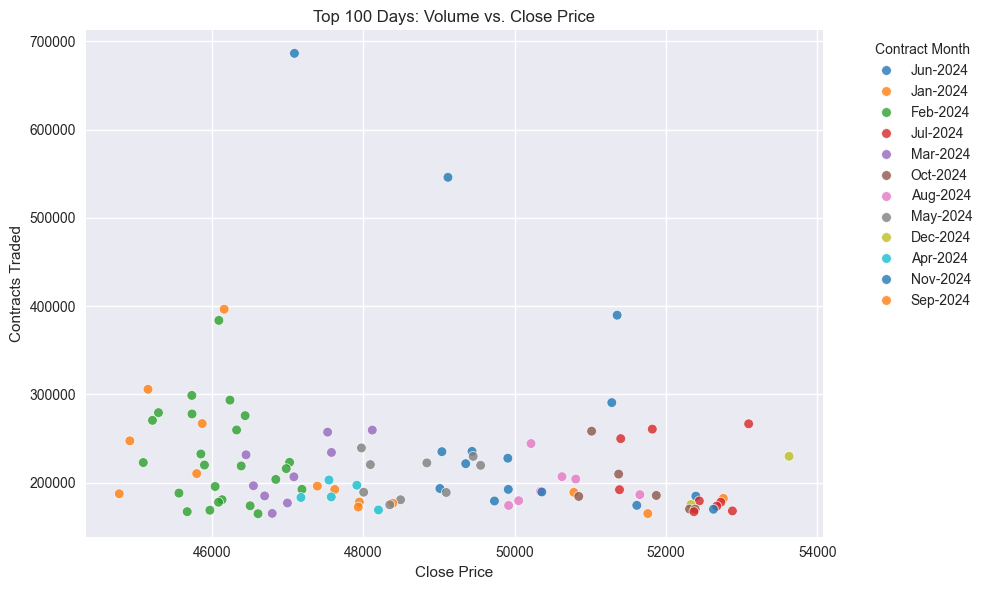

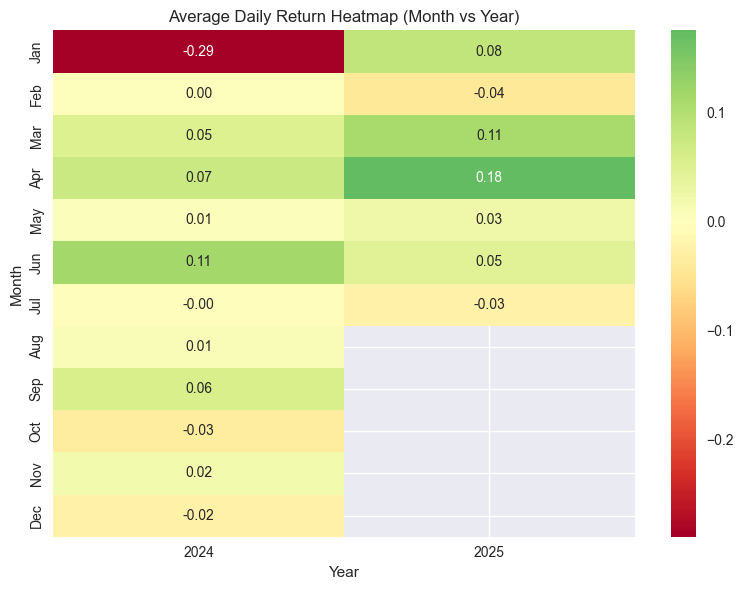

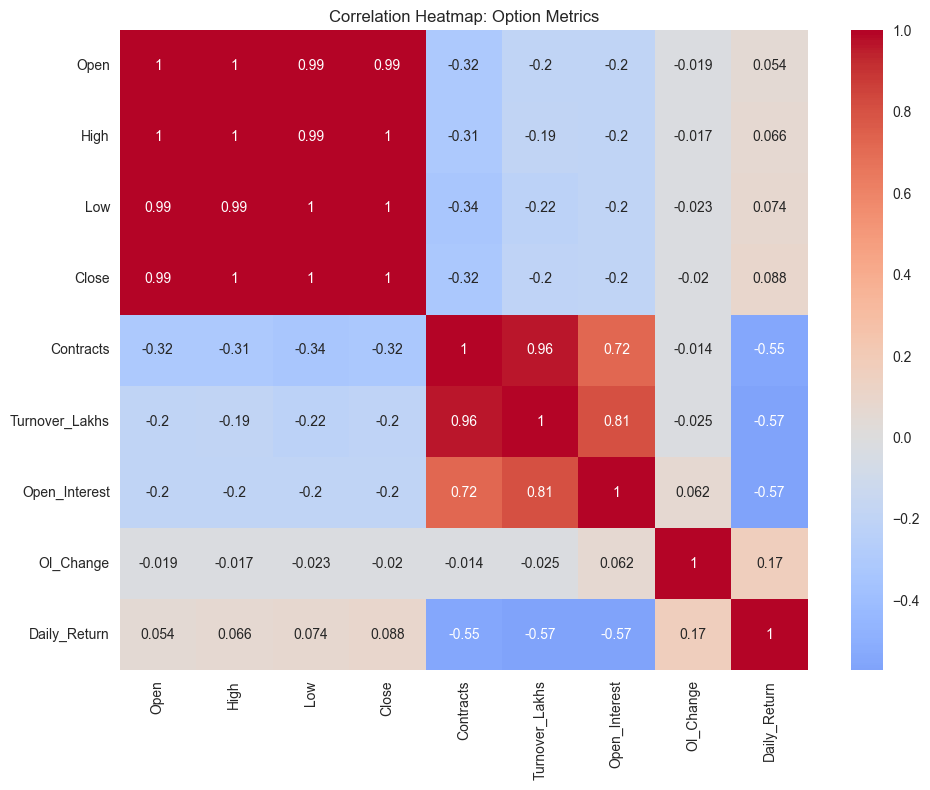

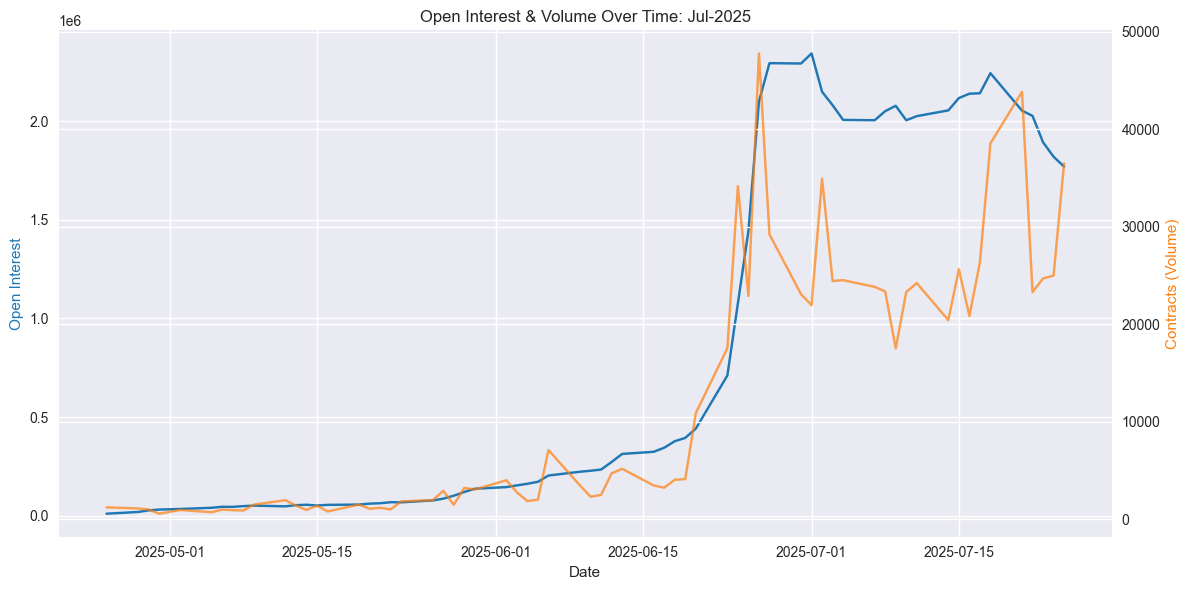

In [20]:
# Visualizing Option Data: Plots & Heatmaps

print("📊 OPTION DATA VISUALIZATION")
print("=" * 35)

# 1. Volume vs. Close Price Scatter Plot (Top 100 by Volume)
plt.figure(figsize=(10, 6))
top_volume = df_clean.nlargest(100, 'Contracts')
sns.scatterplot(data=top_volume, x='Close', y='Contracts', hue='Contract_Month', palette='tab10', alpha=0.8)
plt.title('Top 100 Days: Volume vs. Close Price')
plt.xlabel('Close Price')
plt.ylabel('Contracts Traded')
plt.legend(title='Contract Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Heatmap: Daily Returns by Month and Year
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.strftime('%b')
pivot_returns = df_clean.pivot_table(index='Month', columns='Year', values='Daily_Return', aggfunc='mean')
pivot_returns = pivot_returns.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_returns, annot=True, fmt=".2f", cmap='RdYlGn', center=0)
plt.title('Average Daily Return Heatmap (Month vs Year)')
plt.ylabel('Month')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# 3. Heatmap: Correlation Matrix for Option Metrics
option_metrics = ['Open', 'High', 'Low', 'Close', 'Contracts', 'Turnover_Lakhs', 'Open_Interest', 'OI_Change', 'Daily_Return']
corr_matrix = df_clean[option_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Option Metrics')
plt.tight_layout()
plt.show()

# 4. Line Plot: Open Interest and Volume Over Time (Most Active Contract)
active_contract_data = df_clean[df_clean['Contract_Month'] == most_active_contract]
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(active_contract_data['Date'], active_contract_data['Open_Interest'], color='tab:blue', label='Open Interest')
ax2.plot(active_contract_data['Date'], active_contract_data['Contracts'], color='tab:orange', label='Contracts (Volume)', alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Open Interest', color='tab:blue')
ax2.set_ylabel('Contracts (Volume)', color='tab:orange')
plt.title(f'Open Interest & Volume Over Time: {most_active_contract}')
fig.tight_layout()
plt.show()

# Clean up temporary columns
df_clean.drop(['Year', 'Month'], axis=1, inplace=True)

## 6. Bank Nifty Index Data from Yahoo Finance

Downloading Bank Nifty index data from Yahoo Finance for the same date range to compare with futures data and analyze the underlying index performance.

In [35]:
# Download Bank Nifty Index data from Yahoo Finance
#!pip install yfinance
import yfinance as yf

print("📥 DOWNLOADING BANK NIFTY DATA FROM YAHOO FINANCE")
print("=" * 55)

try:
    # Get date range from futures data
    start_date = df_clean['Date'].min()
    end_date = df_clean['Date'].max()
    
    print(f"🔍 Fetching Bank Nifty data for:")
    print(f"   Start Date: {start_date.strftime('%d-%b-%Y')}")
    print(f"   End Date:   {end_date.strftime('%d-%b-%Y')}")
    print(f"   Total Days: {(end_date - start_date).days} calendar days")
    
    # Download Bank Nifty data (^NSEBANK is the Yahoo Finance symbol for Bank Nifty)
    print(f"\n📊 Downloading data...")
    bank_nifty = yf.download('^NSEBANK', start=start_date, end=end_date + pd.Timedelta(days=1))
    
    if not bank_nifty.empty:
        print(f"📋 Raw data shape: {bank_nifty.shape}")
        print(f"📋 Raw columns: {list(bank_nifty.columns)}")
        
        # Reset index to make Date a column
        bank_nifty = bank_nifty.reset_index()
        
        # Handle multi-level columns from yfinance
        if isinstance(bank_nifty.columns, pd.MultiIndex):
            # Flatten multi-level columns
            bank_nifty.columns = [col[0] if len(col) > 1 else col for col in bank_nifty.columns]
        
        # Ensure Date column is properly handled
        if 'Date' not in bank_nifty.columns:
            # If Date is still in index, reset again
            if bank_nifty.index.name == 'Date' or 'Date' in str(bank_nifty.index.name).lower():
                bank_nifty = bank_nifty.reset_index()
        
        # Convert Date column to datetime
        if 'Date' in bank_nifty.columns:
            bank_nifty['Date'] = pd.to_datetime(bank_nifty['Date'])
        else:
            print(f"❌ Date column not found. Available columns: {list(bank_nifty.columns)}")
            bank_nifty = pd.DataFrame()
        
        if not bank_nifty.empty:
            # Ensure we have the basic OHLCV columns
            required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
            missing_cols = [col for col in required_cols if col not in bank_nifty.columns]
            if missing_cols:
                print(f"❌ Missing columns: {missing_cols}")
                print(f"Available columns: {list(bank_nifty.columns)}")
                bank_nifty = pd.DataFrame()
            else:
                # Calculate additional metrics
                bank_nifty['Daily_Return'] = bank_nifty['Close'].pct_change() * 100
                bank_nifty['Intraday_Range'] = bank_nifty['High'] - bank_nifty['Low']
                bank_nifty['Intraday_Range_Pct'] = (bank_nifty['Intraday_Range'] / bank_nifty['Open']) * 100
        
        print(f"✅ Successfully downloaded Bank Nifty data!")
        print(f"📊 Dataset shape: {bank_nifty.shape}")
        print(f"📅 Actual date range: {bank_nifty['Date'].min().strftime('%d-%b-%Y')} to {bank_nifty['Date'].max().strftime('%d-%b-%Y')}")
        print(f"💰 Price range: ₹{bank_nifty['Low'].min():,.2f} - ₹{bank_nifty['High'].max():,.2f}")
        
        # Display basic statistics
        print(f"\n📋 BANK NIFTY INDEX STATISTICS:")
        print("-" * 35)
        bn_stats = bank_nifty[['Open', 'High', 'Low', 'Close', 'Volume']].describe()
        display(bn_stats)
        
        # Display sample data
        print(f"\n🔍 SAMPLE DATA:")
        print("-" * 15)
        display(bank_nifty[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']].head(10))
        
    else:
        print("❌ No data retrieved from Yahoo Finance")
        bank_nifty = pd.DataFrame()
        
except Exception as e:
    print(f"❌ Error downloading data: {e}")
    print("💡 Tip: Make sure you have yfinance installed: pip install yfinance")
    bank_nifty = pd.DataFrame()

📥 DOWNLOADING BANK NIFTY DATA FROM YAHOO FINANCE
🔍 Fetching Bank Nifty data for:
   Start Date: 01-Jan-2024
   End Date:   25-Jul-2025
   Total Days: 571 calendar days

📊 Downloading data...


[*********************100%***********************]  1 of 1 completed

📋 Raw data shape: (384, 5)
📋 Raw columns: [('Close', '^NSEBANK'), ('High', '^NSEBANK'), ('Low', '^NSEBANK'), ('Open', '^NSEBANK'), ('Volume', '^NSEBANK')]
✅ Successfully downloaded Bank Nifty data!
📊 Dataset shape: (384, 9)
📅 Actual date range: 02-Jan-2024 to 25-Jul-2025
💰 Price range: ₹44,429.00 - ₹57,628.40

📋 BANK NIFTY INDEX STATISTICS:
-----------------------------------


,Open,High,Low,Close,Volume
count,384.000000,384.000000,384.000000,384.000000,3.840000e+02
mean,50934.631022,51247.949646,50608.476288,50932.501821,5.385443e+05
std,3120.955299,3100.988809,3137.350603,3125.769974,6.833590e+06
min,44489.398438,45139.050781,44429.000000,44866.148438,0.000000e+00
25%,48457.238281,48773.412109,48194.638672,48496.862305,1.358250e+05
50%,50974.798828,51335.675781,50579.849609,50982.824219,1.707500e+05
75%,52662.624023,52859.886719,52270.925781,52669.201172,2.239000e+05
max,57558.199219,57628.398438,57193.800781,57459.449219,1.340894e+08



🔍 SAMPLE DATA:
---------------


,Date,Open,High,Low,Close,Volume,Daily_Return
0,2024-01-02,48194.800781,48223.550781,47689.800781,47761.648438,183200,NaN
1,2024-01-03,47796.300781,47798.750000,47481.351562,47704.949219,233300,-0.118713
2,2024-01-04,47805.398438,48281.199219,47738.148438,48195.851562,175700,1.029039
3,2024-01-05,48245.550781,48381.949219,47822.851562,48159.000000,181000,-0.076462
4,2024-01-08,48096.648438,48154.500000,47387.351562,47450.250000,231400,-1.471688
5,2024-01-09,47705.398438,47939.300781,47156.050781,47242.648438,161000,-0.437514
6,2024-01-10,47073.851562,47423.449219,47010.800781,47360.851562,165200,0.250204
7,2024-01-11,47538.601562,47662.101562,47237.000000,47438.351562,132500,0.163637
8,2024-01-12,47572.699219,47873.699219,47408.500000,47709.800781,191600,0.572215
9,2024-01-15,47891.050781,48248.050781,47825.398438,48158.300781,167100,0.940058


📈 Plotting Bank Nifty Index Data (Yahoo Finance)


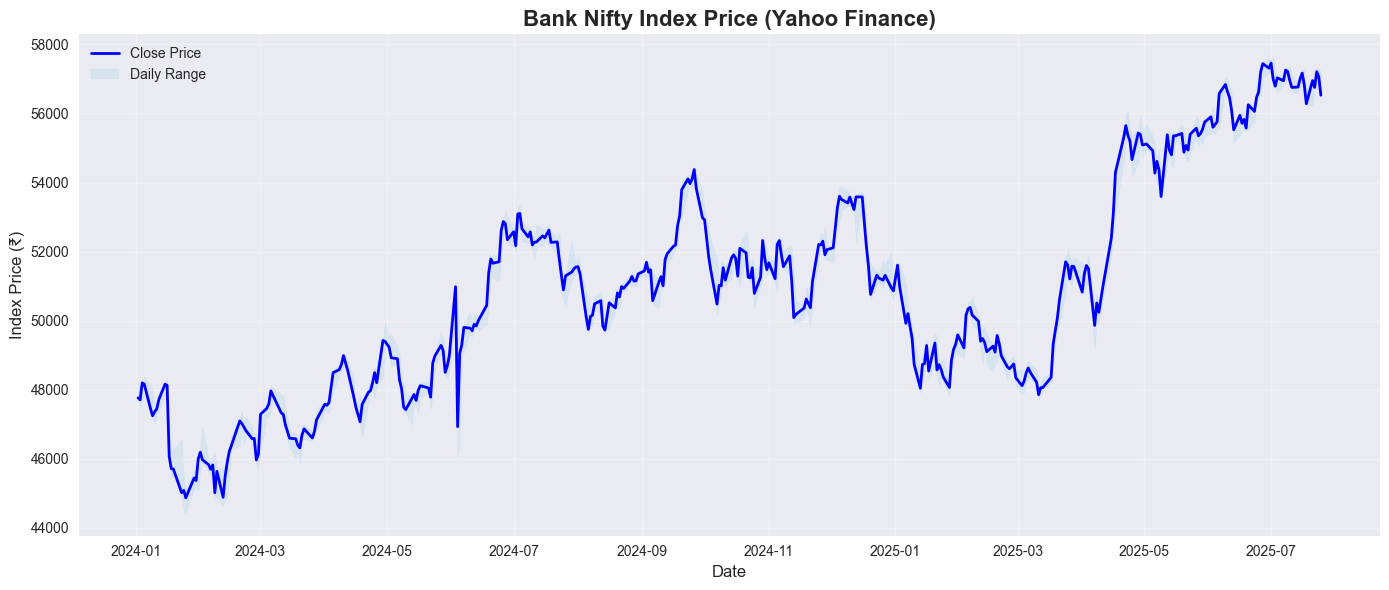

In [37]:
# Plot Bank Nifty Index data downloaded from yfinance
if not bank_nifty.empty:
    print("📈 Plotting Bank Nifty Index Data (Yahoo Finance)")
    plt.figure(figsize=(14, 6))
    plt.plot(bank_nifty['Date'], bank_nifty['Close'], label='Close Price', color='blue', linewidth=2)
    plt.fill_between(bank_nifty['Date'], bank_nifty['Low'], bank_nifty['High'], color='skyblue', alpha=0.2, label='Daily Range')
    plt.title('Bank Nifty Index Price (Yahoo Finance)', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Index Price (₹)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("❌ No Bank Nifty data available to plot.")

In [ ]:
#!pip install plotly ipywidgets
from ipywidgets import widgets, interact
from datetime import datetime

import plotly.graph_objs as go
import plotly.express as px

# Use bank_nifty DataFrame for the interactive plot
if not bank_nifty.empty:
    # Prepare dropdowns for price type and date range slider
    price_options = ['Open', 'High', 'Low', 'Close']
    min_date = bank_nifty['Date'].min()
    max_date = bank_nifty['Date'].max()

    # Create widgets
    price_dropdown = widgets.Dropdown(
        options=price_options,
        value='Close',
        description='Price Type:',
        style={'description_width': 'initial'}
    )
    date_range_slider = widgets.SelectionRangeSlider(
        options=[d.strftime('%Y-%m-%d') for d in bank_nifty['Date']],
        index=(0, len(bank_nifty['Date'])-1),
        description='Date Range:',
        orientation='horizontal',
        layout={'width': '800px'},
        style={'description_width': 'initial'}
    )

    def plot_interactive_stock(price_type, date_range):
        # Convert string dates back to datetime
        start, end = [datetime.strptime(d, '%Y-%m-%d') for d in date_range]
        mask = (bank_nifty['Date'] >= start) & (bank_nifty['Date'] <= end)
        data = bank_nifty.loc[mask]

        fig = go.Figure()
        fig.add_trace(go.Scatter(
            x=data['Date'],
            y=data[price_type],
            mode='lines+markers',
            name=price_type,
            line=dict(width=2),
            marker=dict(size=4)
        ))
        fig.update_layout(
            title=f'Bank Nifty Index: {price_type} Price',
            xaxis_title='Date',
            yaxis_title=f'{price_type} Price (₹)',
            hovermode='x unified',
            height=500
        )
        fig.show()

    interact(plot_interactive_stock, price_type=price_dropdown, date_range=date_range_slider)
else:
    print("❌ No Bank Nifty data available for interactive plot.")

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl (216 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)

   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/

In [36]:
# Plot Bank Nifty Index Price and Futures Price in Separate Plots
if not bank_nifty.empty and not comparison_data.empty:
    print("📊 PLOTTING BANK NIFTY INDEX vs FUTURES PRICES")
    print("=" * 50)
    
    # Create subplots with 2 rows
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: Bank Nifty Index Price
    ax1.plot(bank_nifty['Date'], bank_nifty['Close'], 
             color='blue', linewidth=2, label='Bank Nifty Index Close')
    ax1.fill_between(bank_nifty['Date'], bank_nifty['Low'], bank_nifty['High'], 
                     alpha=0.2, color='blue', label='Daily Range')
    ax1.set_title('Bank Nifty Index Price Movement', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Index Price (₹)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Add statistics text box for index
    index_stats = f"""Statistics:
    Min: ₹{bank_nifty['Close'].min():,.0f}
    Max: ₹{bank_nifty['Close'].max():,.0f}
    Avg: ₹{bank_nifty['Close'].mean():,.0f}
    Volatility: {bank_nifty['Daily_Return'].std():.2f}%"""
    
    ax1.text(0.02, 0.98, index_stats, transform=ax1.transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    # Plot 2: Bank Nifty Futures Price
    ax2.plot(comparison_data['Date'], comparison_data['Close_Futures'], 
             color='red', linewidth=2, label='Bank Nifty Futures Close')
    ax2.set_title('Bank Nifty Futures Price Movement', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Futures Price (₹)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add statistics text box for futures
    futures_stats = f"""Statistics:
    Min: ₹{comparison_data['Close_Futures'].min():,.0f}
    Max: ₹{comparison_data['Close_Futures'].max():,.0f}
    Avg: ₹{comparison_data['Close_Futures'].mean():,.0f}
    Volatility: {comparison_data['Daily_Return_Futures'].std():.2f}%"""
    
    ax2.text(0.02, 0.98, futures_stats, transform=ax2.transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
    
    # Format x-axis dates
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Additional side-by-side comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Left plot: Index with volume
    ax1_vol = ax1.twinx()
    ax1.plot(bank_nifty['Date'], bank_nifty['Close'], color='blue', linewidth=2, label='Index Price')
    ax1_vol.bar(bank_nifty['Date'], bank_nifty['Volume'], alpha=0.3, color='gray', label='Volume')
    ax1.set_title('Bank Nifty Index: Price & Volume', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Index Price (₹)', color='blue', fontsize=11)
    ax1_vol.set_ylabel('Volume', color='gray', fontsize=11)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Right plot: Futures with contracts
    ax2_vol = ax2.twinx()
    ax2.plot(comparison_data['Date'], comparison_data['Close_Futures'], color='red', linewidth=2, label='Futures Price')
    ax2_vol.bar(comparison_data['Date'], comparison_data['Contracts'], alpha=0.3, color='orange', label='Contracts')
    ax2.set_title('Bank Nifty Futures: Price & Volume', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Futures Price (₹)', color='red', fontsize=11)
    ax2_vol.set_ylabel('Contracts', color='orange', fontsize=11)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Interactive Plotly charts
    print(f"\n📊 INTERACTIVE CHARTS:")
    print("-" * 22)
    
    # Interactive Index chart
    fig_index = go.Figure()
    fig_index.add_trace(go.Scatter(
        x=bank_nifty['Date'], 
        y=bank_nifty['Close'],
        mode='lines',
        name='Bank Nifty Index',
        line=dict(color='blue', width=2),
        hovertemplate='Date: %{x}<br>Price: ₹%{y:,.0f}<extra></extra>'
    ))
    
    fig_index.update_layout(
        title='Interactive Bank Nifty Index Price Chart',
        xaxis_title='Date',
        yaxis_title='Index Price (₹)',
        hovermode='x unified',
        height=500
    )
    fig_index.show()
    
    # Interactive Futures chart
    fig_futures = go.Figure()
    fig_futures.add_trace(go.Scatter(
        x=comparison_data['Date'], 
        y=comparison_data['Close_Futures'],
        mode='lines',
        name='Bank Nifty Futures',
        line=dict(color='red', width=2),
        hovertemplate='Date: %{x}<br>Price: ₹%{y:,.0f}<extra></extra>'
    ))
    
    fig_futures.update_layout(
        title='Interactive Bank Nifty Futures Price Chart',
        xaxis_title='Date',
        yaxis_title='Futures Price (₹)',
        hovermode='x unified',
        height=500
    )
    fig_futures.show()
    
    print(f"✅ All price charts generated successfully!")
    
else:
    print("❌ Cannot create plots - missing data")
    print("💡 Make sure both Bank Nifty index and futures data are available")

❌ Cannot create plots - missing data
💡 Make sure both Bank Nifty index and futures data are available
